In [1]:
import sklearn
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [132]:
iris = datasets.load_iris()

X = iris['data']
y = iris['target']

### PCA by eigendecomposition

In [9]:
# subtract feature means
scaler = StandardScaler(with_std=False)
X_hat = scaler.fit_transform(X)

# compute covariance matrix
X_cov = X_hat.T @ X_hat

# compute eig decomp of cov matrix (may not be sorted)
eigvals, eigvecs = np.linalg.eig(X_cov)

# sort eigvals, select k components
n_comp = 2
sorted_eigvals = np.argsort(eigvals)[::-1]

# compute coordinates in new space
X_new = X_hat @ eigvecs[:, sorted_eigvals[:n_comp]]

### PCA by SVD

In [133]:
# subtract feature means
scaler = StandardScaler(with_std=False)
X_hat = scaler.fit_transform(X)

# compute svd
U, S, Wh = np.linalg.svd(X_hat)

# right singular matrix's columns are eigvecs (sorted)
W = Wh.T

# compute coordinates in new space
n_comp = 2
X_new = X_hat @ W[:,:n_comp]

# reconstruction
X_rec = scaler.inverse_transform(X_new @ W[:,:n_comp].T)

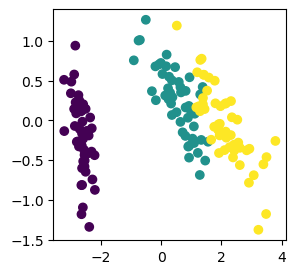

In [134]:
plt.figure(figsize=(3, 3))
plt.scatter(x=X_new[:,0],y=X_new[:,1],c=y)

### validate above by sklearn's implementation

In [135]:
pca = PCA(n_components=2, svd_solver='full')

X_sk = pca.fit_transform(X)

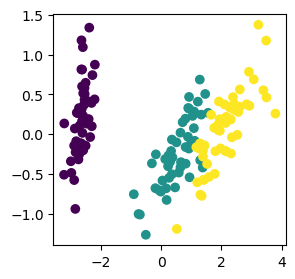

In [136]:
plt.figure(figsize=(3, 3))
plt.scatter(x=X_sk[:,0],y=X_sk[:,1],c=y)

### eigenfaces example

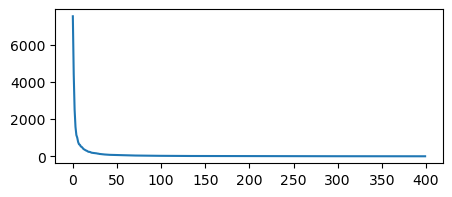

In [140]:
# load dataset
X, y = datasets.fetch_olivetti_faces(return_X_y=True)

# subtract feature means
scaler = StandardScaler(with_std=False)
X_hat = scaler.fit_transform(X)

# compute svd
U, S, Wh = np.linalg.svd(X_hat)

# right singular matrix's columns are eigvecs (sorted)
W = Wh.T

# select new dimensionality by elbow
plt.figure(figsize=(5, 2))
plt.plot(np.arange(len(S)),S**2)
n_comp = 20

In [141]:
# compute coordinates in new space
X_new = X_hat @ W[:,:n_comp]

In [142]:
# re-project to the original space
X_rec = X_new @ W[:,:n_comp].T

# add means
X_rec = scaler.inverse_transform(X_rec)

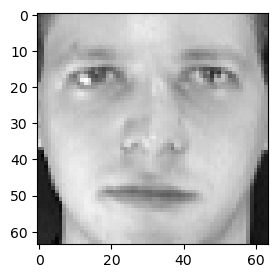

In [144]:
plt.figure(figsize=(3, 3))
plt.imshow(np.reshape(X[0,:],(64,-1)),cmap='gray')

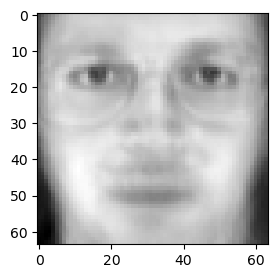

In [145]:
plt.figure(figsize=(3, 3))
plt.imshow(np.reshape(X_rec[0,:],(64,-1)),cmap='gray')